### Datasets

In [3]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt

#### ScanQA

In [6]:
# Config paths (adjust if needed)
scanqa_file = '../data/qa/ScanQA/ScanQA_v1.0_train.json'
image_folder = '../data/qa/scannetv2/frames_square'

# Load the dataset
with open(scanqa_file, 'r') as f:
    scanqa_data = json.load(f)

# Print dataset size
print(f"Total samples: {len(scanqa_data)}")

Total samples: 25563


In [10]:
# View one sample
sample = scanqa_data[0]
sample

{'answers': ['brown cabinet with tv sitting in it'],
 'object_ids': [8],
 'object_names': ['cabinet'],
 'question': 'What is in the right corner of room by curtains?',
 'question_id': 'train-scene0000-0',
 'scene_id': 'scene0000_00'}


Scene has 279 images total


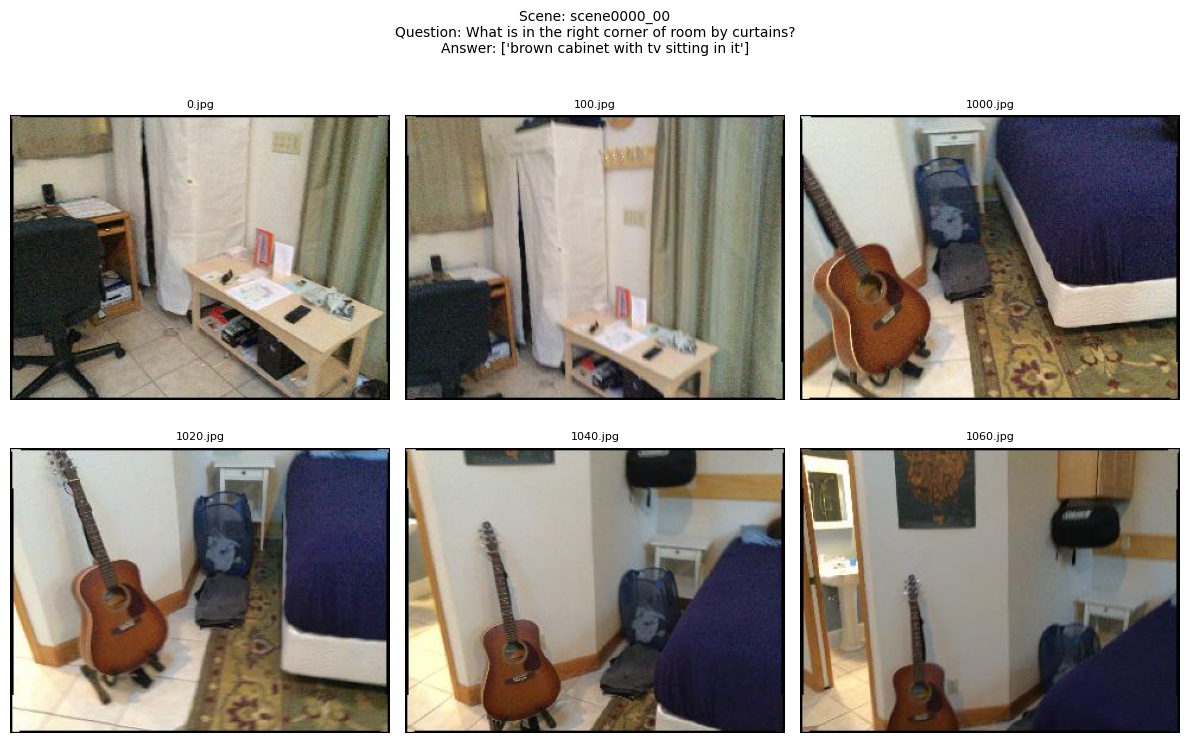

In [11]:
# Show a few images from this scene
scene_id = sample['scene_id']
color_folder = os.path.join(image_folder, scene_id, 'color')
image_files = sorted(os.listdir(color_folder))[:6]  # First 6 images

print(f"\nScene has {len(os.listdir(color_folder))} images total")

# Display images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle(f"Scene: {scene_id}\nQuestion: {sample['question']}\nAnswer: {sample['answers']}", fontsize=10)

for idx, (ax, img_file) in enumerate(zip(axes.flat, image_files)):
    img_path = os.path.join(color_folder, img_file)
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(img_file, fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()

#### SQA

In [1]:
# Config paths (adjust if needed)
sqa_file = '../data/qa/SQA/SQA_val.json'
image_folder = '../data/qa/scannetv2/frames_square'

In [4]:
# Load the dataset
with open(sqa_file, 'r') as f:
    sqa_data = json.load(f)

In [5]:
# Print dataset size
print(f"Total samples: {len(sqa_data)}")

Total samples: 3261


In [16]:
# View one sample
sample = sqa_data[0]
sample

{'answers': ['right'],
 'object_ids': [],
 'object_names': [],
 'question': 'Which direction should I toss a used napkin?',
 'situation': 'I am wiping a table that has a trash can next to it, while having a large table behind me with lots of chairs.',
 'question_id': 220602000037,
 'scene_id': 'scene0249_00',
 'position': [-1.612321909455232,
  3.8766019062927524,
  0,
  0,
  0,
  0.9436221923009414,
  -0.33102440725287985]}


Scene has 136 images total


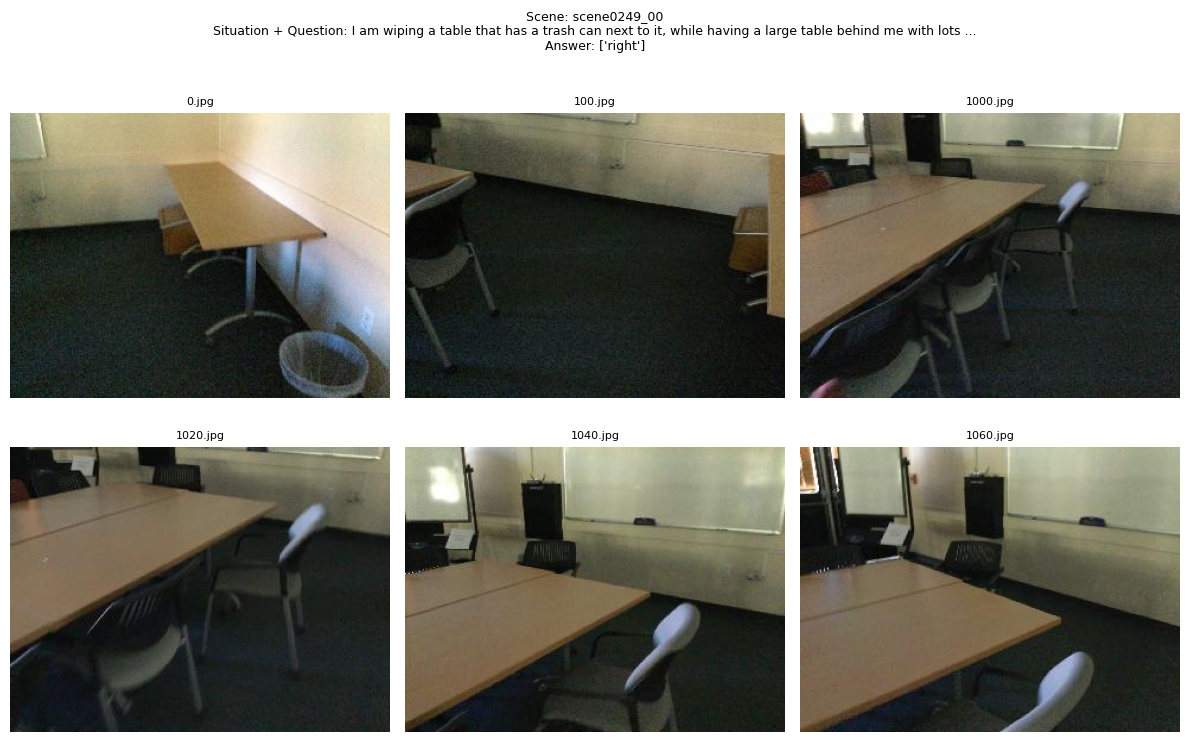

In [18]:
# Show a few images from this scene
scene_id = sample['scene_id']
color_folder = os.path.join(image_folder, scene_id, 'color')
image_files = sorted(os.listdir(color_folder))[:6]  # First 6 images

print(f"\nScene has {len(os.listdir(color_folder))} images total")

# Display images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Format the full question (situation + question) like inference does
full_question = sample.get('situation', '') + sample['question']
fig.suptitle(f"Scene: {scene_id}\nSituation + Question: {full_question[:100]}...\nAnswer: {sample.get('answers', 'N/A')}", 
             fontsize=9, wrap=True)

for idx, (ax, img_file) in enumerate(zip(axes.flat, image_files)):
    img_path = os.path.join(color_folder, img_file)
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(img_file, fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()

#### LLAVA-OV

In [19]:
import torch
from PIL import Image
import sys
sys.path.append('..')
from llava.model.builder import load_pretrained_model
from llava.mm_utils import get_model_name_from_path, process_images, tokenizer_image_token
from llava.constants import IMAGE_TOKEN_INDEX, DEFAULT_IMAGE_TOKEN
from llava.conversation import conv_templates

/jet/home/aanugu/.conda/envs/cdviews/lib/python3.10/site-packages/torch/cuda/__init__.py:51: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]
/jet/home/aanugu/.conda/envs/cdviews/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/jet/home/aanugu/.conda/envs/cdviews/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [20]:
# ============================================
# 1. Load Model
# ============================================
model_path = '../data/qa/model/llava-onevision-qwen2-7b-ov'
model_name = get_model_name_from_path(model_path)
tokenizer, model, image_processor, context_len = load_pretrained_model(
    model_path, model_base=None, model_name=model_name
)

Loaded LLaVA model: ../data/qa/model/llava-onevision-qwen2-7b-ov


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
You are using a model of type llava to instantiate a model of type llava_qwen. This is not supported for all configurations of models and can yield errors.


Loading vision tower: google/siglip-so400m-patch14-384


/jet/home/aanugu/.conda/envs/cdviews/lib/python3.10/site-packages/torch/nn/modules/module.py:2025: UserWarning: for vision_model.embeddings.patch_embedding.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(f'for {key}: copying from a non-meta parameter in the checkpoint to a meta '
/jet/home/aanugu/.conda/envs/cdviews/lib/python3.10/site-packages/torch/nn/modules/module.py:2025: UserWarning: for vision_model.embeddings.patch_embedding.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(f'for {key}: copying from a non-meta 

Model Class: LlavaQwenForCausalLM


In [23]:
# ============================================
# 2. Simple Inference
# ============================================
# Load image
image_path = '../data/qa/scannetv2/frames_square/scene0249_00/color/0.jpg'
image = Image.open(image_path).convert('RGB')

# Preprocess image - use image_processor.preprocess() directly
image_tensor = image_processor.preprocess(image, return_tensors='pt')['pixel_values']
image_tensor = image_tensor.half().to(model.device)

# Create prompt
situation = "I am standing in the room. "
question = "Describe the room in detail. What objects are present and where are they located ?"
prompt = DEFAULT_IMAGE_TOKEN + "\n" + situation + question

# Use conversation template
conv = conv_templates["qwen_1_5"].copy()
conv.append_message(conv.roles[0], prompt)
conv.append_message(conv.roles[1], None)
prompt_text = conv.get_prompt()

# Tokenize
input_ids = tokenizer_image_token(prompt_text, tokenizer, IMAGE_TOKEN_INDEX, return_tensors='pt')
input_ids = input_ids.unsqueeze(0).to(model.device)

# Generate - pass as list of tensors
with torch.inference_mode():
    output_ids = model.generate(
        input_ids,
        images=[image_tensor],  # list of [1, 3, H, W] tensors
        max_new_tokens=256,
        do_sample=False
    )

# Decode
answer = tokenizer.decode(output_ids[0], skip_special_tokens=True)
print(f"Answer: {answer}")

Answer: The room features a long, rectangular table positioned against the wall. The table has a light-colored wooden top and metal legs with curved supports. To the left of the table, there is a cardboard box placed on the floor. On the right side of the table, there is a trash can with a clear plastic liner. The walls are painted in a light color, and the floor appears to be carpeted in a dark shade. There are no other objects or furniture visible in the room.


In [29]:
# ============================================
# 2. Simple Inference
# ============================================
# Load image
image_path = '../data/qa/scannetv2/frames_square/scene0249_00/color/0.jpg'
image = Image.open(image_path).convert('RGB')

# Preprocess image - use image_processor.preprocess() directly
image_tensor = image_processor.preprocess(image, return_tensors='pt')['pixel_values']
image_tensor = image_tensor.half().to(model.device)

# Create prompt
situation = "I am wiping a table that has a trash can next to it, while having a large table behind me with lots of chairs."
question = "Which direction should I toss a used napkin?"
prompt = DEFAULT_IMAGE_TOKEN + "\n" + situation + question

# Use conversation template
conv = conv_templates["qwen_1_5"].copy()
conv.append_message(conv.roles[0], prompt)
conv.append_message(conv.roles[1], None)
prompt_text = conv.get_prompt()

# Tokenize
input_ids = tokenizer_image_token(prompt_text, tokenizer, IMAGE_TOKEN_INDEX, return_tensors='pt')
input_ids = input_ids.unsqueeze(0).to(model.device)

# Generate - pass as list of tensors
with torch.inference_mode():
    output_ids = model.generate(
        input_ids,
        images=[image_tensor],  # list of [1, 3, H, W] tensors
        max_new_tokens=256,
        do_sample=False
    )

# Decode
answer = tokenizer.decode(output_ids[0], skip_special_tokens=True)
print(f"Answer: {answer}")

Answer: into the trash can,


In [30]:
# ============================================
# 2. Simple Inference
# ============================================
# Load image
image_path = '../data/qa/scannetv2/frames_square/scene0249_00/color/0.jpg'
image = Image.open(image_path).convert('RGB')

# Preprocess image - use image_processor.preprocess() directly
image_tensor = image_processor.preprocess(image, return_tensors='pt')['pixel_values']
image_tensor = image_tensor.half().to(model.device)

# Create prompt
situation = "I am wiping a table that has a trash can next to it, while having a large table behind me with lots of chairs."
question = "Which direction (right or left) should I toss a used napkin?"
prompt = DEFAULT_IMAGE_TOKEN + "\n" + situation + question

# Use conversation template
conv = conv_templates["qwen_1_5"].copy()
conv.append_message(conv.roles[0], prompt)
conv.append_message(conv.roles[1], None)
prompt_text = conv.get_prompt()

# Tokenize
input_ids = tokenizer_image_token(prompt_text, tokenizer, IMAGE_TOKEN_INDEX, return_tensors='pt')
input_ids = input_ids.unsqueeze(0).to(model.device)

# Generate - pass as list of tensors
with torch.inference_mode():
    output_ids = model.generate(
        input_ids,
        images=[image_tensor],  # list of [1, 3, H, W] tensors
        max_new_tokens=256,
        do_sample=False
    )

# Decode
answer = tokenizer.decode(output_ids[0], skip_special_tokens=True)
print(f"Answer: {answer}")

Answer: right,


/jet/home/aanugu/.conda/envs/cdviews/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:492: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/jet/home/aanugu/.conda/envs/cdviews/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:497: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.8` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/jet/home/aanugu/.conda/envs/cdviews/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:509: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `20` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(


In [32]:
image_tensor.shape

torch.Size([1, 3, 384, 384])